In [2]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-20/netflix_titles.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Are foreign movies (on Netflix) typically longer?

In [4]:
movies = data[data.type == "Movie"].copy() # make a copy to avoid settingwithcopy warning

movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [5]:
movies["duration_min"] = movies["duration"].str.replace(" min", "").astype(int)

# https://www.dataquest.io/blog/settingwithcopywarning/

In [6]:
movies.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
duration_min     int32
dtype: object

In [7]:
import matplotlib.pyplot as plt

# figure out how to use matplotlib

<AxesSubplot:xlabel='duration_min', ylabel='Count'>

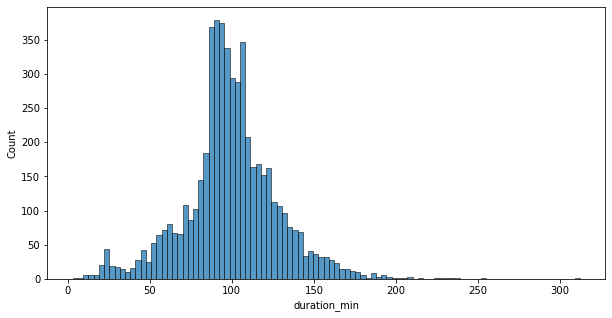

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = movies, x = "duration_min") # seems straightforward

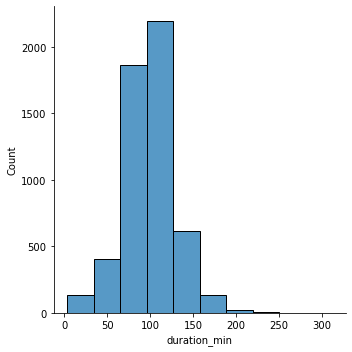

In [46]:
sns.displot(data = movies, x = "duration_min", bins = 10)

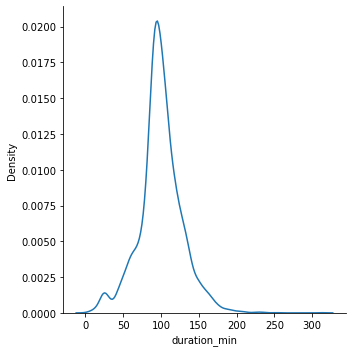

In [10]:
sns.displot(data = movies, x = "duration_min", kind = "kde")

In [11]:
movies["country"].value_counts() # see top and bottom value counts

United States                                 1850
India                                          852
United Kingdom                                 193
Canada                                         118
Egypt                                           89
                                              ... 
Czech Republic, Slovakia                         1
United States, Canada, Germany                   1
United States, India, United Arab Emirates       1
Russia, Spain                                    1
United States, Australia, Mexico                 1
Name: country, Length: 590, dtype: int64

<AxesSubplot:xlabel='international', ylabel='count'>

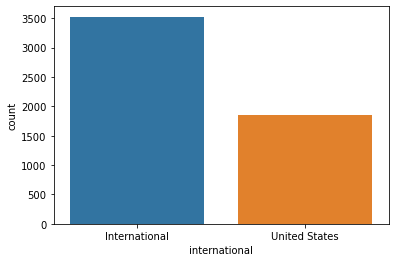

In [49]:
# Better to use single quotes or double?
import numpy as np

movies['international'] = np.where(movies['country'] == 'United States', "United States", "International")

sns.countplot(data = movies, x = "international")

In [53]:
pd.crosstab(movies.rating, movies.international)
# using movies.rating instead of movies['rating']
# Not sure why movies have tv ratings

international,International,United States
rating,,
G,216,151
NC-17,2,1
NR,50,34
PG,465,287
PG-13,1231,427
R,1561,947


In [51]:
movies = movies.replace({'rating' : {'TV-G' : 'G', 'TV-14' : 'PG-13', 'TV-MA' : 'R', 'TV-PG' : 'PG', 'TV-Y' : 'G', 'TV-Y7' : 'G', 'TV-Y7-FV' : 'G', 'UR' : 'NR'}})

movies['rating'].value_counts()

R        2508
PG-13    1658
PG        752
G         367
NR         84
NC-17       3
Name: rating, dtype: int64

In [56]:
movies = movies[(movies.rating != 'NC-17')] # too few of these movies

# reorder by rating

movies['rating'] = movies['rating'].astype('category')

movies['rating'] = movies['rating'].cat.reorder_categories(['G', 'PG', 'PG-13', 'R', 'NR'])

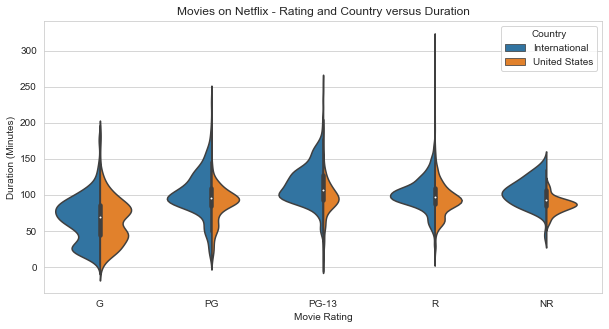

In [61]:
# when does seaborn return an axis object (like here) versus a figure (FacetGrid)?

sns.set_style("whitegrid")

plt.figure(figsize = (10, 5)) # use matplotlib to change the size

ax = sns.violinplot(data = movies, hue = "international", y = "duration_min",
              x = "rating", scale = "count", split = True)

ax.set(xlabel = "Movie Rating", ylabel = "Duration (Minutes)",
      title = "Movies on Netflix - Rating and Country versus Duration")

ax.legend().set_title('Country')

# so essentially each of these lines modifies ax?